Hello, here I am doing some analysis and EDA on the 2021 Hospital Discharge Data public use data file. This is the most recent data on the website https://www.dshs.texas.gov/thcic/hospitals/Inpatientpudf.shtm
In this notebook, I'm going to map out the various locations of hospitals. The unfortunate thing about 2021 data is that it only contains q1 2021 discharge data so my information is only up to early 2021.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('data/IP_Stat_2021.xlsx')

In [3]:
df.head()

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,end of list
0,500000,Hendrick Medical Center,Abilene,441,4258,end of list
1,920000,Encompass Health Rehab Hospital Abilene,Abilene,441,310,end of list
2,973240,Oceans Behavioral Hospital Abilene,Abilene,441,518,end of list
3,973590,ContinueCare Hospital at Hendrick Medical Center,Abilene,441,69,end of list
4,975869,Hendrick Medical Center South,Abilene,441,1439,end of list


In [4]:
# df['COUNTY'].unique()

In [5]:
len(df['COUNTY'].unique())

#so seemingly, there are 182 counties which just have a numerical code. Pretty unfortunate.

183

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   THCIC_ID       699 non-null    object
 1   Hospital_name  699 non-null    object
 2   Hospital_city  699 non-null    object
 3   COUNTY         699 non-null    object
 4   q1             699 non-null    object
 5   end of list    699 non-null    object
dtypes: object(6)
memory usage: 32.9+ KB


In [7]:
df['Hospital_name'].value_counts()

Memorial Hospital                          3
Oakbend Medical Center                     2
Wise Health System                         2
Baylor Emergency Medical Center            2
Texas NeuroRehab Center                    2
                                          ..
Warm Springs Rehab Hospital-San Antonio    1
PAM Rehabilitation Hospital of Beaumont    1
Kindred Hospital-Mansfield                 1
Cogdell Memorial Hospital                  1
LifeCare Hospital of Plano                 1
Name: Hospital_name, Length: 692, dtype: int64

In [8]:
df[df['Hospital_name'] == 'Memorial Hospital']

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,end of list
201,199000,Memorial Hospital,Dumas,341,169,end of list
279,103000,Memorial Hospital,Gonzales,177,164,end of list
587,113000,Memorial Hospital,Seminole,165,300,end of list


In [9]:
# 3 Different Memorial Hospitals in different counties

In [10]:
df['Hospital_city'].value_counts()


Houston        47
San Antonio    40
Dallas         30
Austin         26
Fort Worth     21
               ..
Canadian        1
Brenham         1
Friona          1
Buda            1
Killeen         1
Name: Hospital_city, Length: 272, dtype: int64

In [11]:
df.drop(698, inplace=True)

In [12]:
q1_numeric = df['q1']  

In [13]:
q1_numeric = pd.to_numeric(q1_numeric)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 697
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   THCIC_ID       698 non-null    object
 1   Hospital_name  698 non-null    object
 2   Hospital_city  698 non-null    object
 3   COUNTY         698 non-null    object
 4   q1             698 non-null    object
 5   end of list    698 non-null    object
dtypes: object(6)
memory usage: 38.2+ KB


In [15]:
q1_numeric

0      4258
1       310
2       518
3        69
4      1439
       ... 
693      87
694      70
695      49
696      75
697     152
Name: q1, Length: 698, dtype: int64

In [16]:
q1_numeric.describe()

count      698.000000
mean      1051.356734
std       1685.068734
min          1.000000
25%         88.250000
50%        245.000000
75%       1292.750000
max      10891.000000
Name: q1, dtype: float64

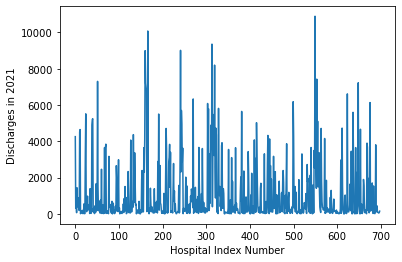

In [17]:
q1_numeric.plot()
plt.xlabel('Hospital Index Number')
plt.ylabel('Discharges in 2021');

In [18]:
df['THCIC_ID'].describe()

count        698
unique       698
top       216001
freq           1
Name: THCIC_ID, dtype: object

There was a hospital which had 10.9k discharges. There were 698 hospitals listed by the Texas Department of State Health Services in 2021. The mean number of discharges was 1051. The median number of discharges was 245. There is a tail to the right of really big hospitals which dealt with many patients and discharges. For example, the hospital which had 10.9k discharges.  There was also 4 hospitals which had only 1 discharge. They were Trinity Hospital in Houston, Cochran Memorial Hospital in Morton, St. Michaels Elite Hospital in Sugar Land, and  CHRISTUS Mother Frances Hospital in Tyler. GIS mapping will help visualize this better.

In [19]:
q1_numeric.describe()

count      698.000000
mean      1051.356734
std       1685.068734
min          1.000000
25%         88.250000
50%        245.000000
75%       1292.750000
max      10891.000000
Name: q1, dtype: float64

In [20]:
q1_numeric.max()

10891

In [21]:
q1_numeric[q1_numeric==1]==True

342    True
460    True
615    True
652    True
Name: q1, dtype: bool

In [22]:
df.iloc[342]

THCIC_ID                   975247
Hospital_name    Trinity Hospital
Hospital_city             Houston
COUNTY                        201
q1                              1
end of list          end of list 
Name: 342, dtype: object

In [23]:
df.iloc[460]

THCIC_ID                            159000
Hospital_name    Cochran Memorial Hospital
Hospital_city                       Morton
COUNTY                                 079
q1                                       1
end of list                   end of list 
Name: 460, dtype: object

In [24]:
df.iloc[615]

THCIC_ID                             975411
Hospital_name    St Michaels Elite Hospital
Hospital_city                    Sugar Land
COUNTY                                  157
q1                                        1
end of list                    end of list 
Name: 615, dtype: object

In [25]:
df.iloc[652]

THCIC_ID                                               975202
Hospital_name    CHRISTUS Mother Frances Hospital-South Tyler
Hospital_city                                           Tyler
COUNTY                                                    423
q1                                                          1
end of list                                      end of list 
Name: 652, dtype: object

Here, I am now beginning to work on 2005 hospital data. This dataset loaded with discharges per quarter, so I'm just going to aggregate them into an annual discharge number. The good thing about this year's data is that the county is labeled rather than given a numerical code.

In [26]:
df_05 = pd.read_excel('data/HospitalStatistics2005.xls')

In [27]:
df_05.head()

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q05 Inpatient Discharges,2q05 Inpatient Discharges,3q05 Inpatient Discharges,4q05 Inpatient Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2358.0,2309.0,2209.0,2188.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4707.0,4369.0,4447.0,4314.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,67.0,51.0,50.0,57.0
3,782700,Abilene Psychiatric Center,Abilene,Taylor,153.0,169.0,203.0,199.0
4,818500,West Texas Hospital,Abilene,Taylor,NaN,NaN,45.0,82.0


In [28]:
df_05['Total Discharges'] = df_05['1q05 Inpatient Discharges'] + df_05['2q05 Inpatient Discharges'] + \
df_05['3q05 Inpatient Discharges'] + df_05['4q05 Inpatient Discharges']

In [29]:
df_05['Total Discharges'].isna().sum()

64

So it turns out there are 64 hospitals which has NaN values for 2005 data. There were 516 unique THCIC ID's meaning that complete annual discharge data is available for 452 hospitals. Over the years, new ones were definitely built. THCIC stands for Texas Health Care Information Collection (THCIC).

In [30]:
len(df_05['Hospital name'].unique())

# Hard to trust this line because of duplicate naming of hospitals that are located in different cities.

505

In [31]:
len(df_05['THCIC_ID'].unique())

516

In [32]:
len(df_05['Hospital city'].unique())

# so there is data for hospitals in 191 cities.

191

In [33]:
len(df_05['Hospital county'].unique())

# those 191 cities reside in 126 counties.

126

In [34]:
df_05.isna().sum()

# 64 hospitals are missing data from >=1 quarter, with as many as 50 hospitals missing data from q1 of 2005.

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q05 Inpatient Discharges    50
2q05 Inpatient Discharges    35
3q05 Inpatient Discharges    20
4q05 Inpatient Discharges    15
Total Discharges             64
dtype: int64

I will now begin taking a look at 2006 hospital data. This will continue all the way up to 2020 and I will perform EDA, data cleaning, and data engineering. If possible, I will then combine these 15 years into a time series and perform further analysis.

In [35]:
df_06 = pd.read_excel('data/HospitalStatistics2006.xls')

In [36]:
df_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   THCIC_ID                   539 non-null    int64  
 1   Hospital name              539 non-null    object 
 2   Hospital city              539 non-null    object 
 3   Hospital county            539 non-null    object 
 4   1q06 Inpatient Discharges  514 non-null    float64
 5   2q06 Inpatient Discharges  521 non-null    float64
 6   3q06 Inpatient Discharges  521 non-null    float64
 7   4q06 Inpatient Discharges  523 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 33.8+ KB


In [37]:
# first thing to note is that there are now 23 more THCIC ID's, meaning data on 23 more hospitals. 

In [38]:
df_06['Total Discharges'] = df_06['1q06 Inpatient Discharges'] + df_06['2q06 Inpatient Discharges'] + \
df_06['3q06 Inpatient Discharges'] + df_06['4q06 Inpatient Discharges']

In [39]:
df_06.isna().sum()
# in this year, there are 43 hospitals which don't have complete data. Since I will aggregate by year later for the time series
# it won't matter too much that some hospitals are missing data for each year, or that new hospitals being built take away
# some patients from existing hospitals.

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q06 Inpatient Discharges    25
2q06 Inpatient Discharges    18
3q06 Inpatient Discharges    18
4q06 Inpatient Discharges    16
Total Discharges             43
dtype: int64

In [40]:
df_06['Total Discharges'].describe()

count      496.000000
mean      5765.905242
std       8130.184861
min         19.000000
25%        575.500000
50%       1757.500000
75%       8398.250000
max      59281.000000
Name: Total Discharges, dtype: float64

Taking a look at 2007 data now.

In [41]:
df_07 = pd.read_excel('data/HospitalStatistics2007.xls')

In [42]:
df_07.info()

# Now there are another 20 hospitals being added since 2006

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   THCIC_ID                   559 non-null    int64  
 1   Hospital name              559 non-null    object 
 2   Hospital city              559 non-null    object 
 3   Hospital county            559 non-null    object 
 4   1q07 Inpatient Discharges  529 non-null    float64
 5   2q07 Inpatient Discharges  531 non-null    float64
 6   3q07 Inpatient Discharges  515 non-null    float64
 7   4q07 Inpatient Discharges  516 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 35.1+ KB


In [43]:
df_07['Total Discharges'] = df_07['1q07 Inpatient Discharges'] + df_07['2q07 Inpatient Discharges'] + \
df_07['3q07 Inpatient Discharges'] + df_07['4q07 Inpatient Discharges']

In [44]:
df_07.isna().sum()

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q07 Inpatient Discharges    30
2q07 Inpatient Discharges    28
3q07 Inpatient Discharges    44
4q07 Inpatient Discharges    43
Total Discharges             75
dtype: int64

In [45]:
df_08 = pd.read_excel('data/HospitalStatistics2008.xls')

In [49]:
df_08['Total Discharges'] = df_08['1q08 Inpatient Discharges'] + df_08['2q08 Inpatient Discharges'] + \
df_08['3q08 Inpatient Discharges'] + df_08['4q08 Inpatient Discharges']

In [55]:
df_08

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q08 Inpatient Discharges,2q08 Inpatient Discharges,3q08 Inpatient Discharges,4q08 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2594.0,2214.0,2303.0,2196.0,9307.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4135.0,4166.0,4312.0,4267.0,16880.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,60.0,49.0,57.0,45.0,211.0
3,846000,Acadia Abilene,Abilene,Taylor,24.0,355.0,359.0,363.0,1101.0
4,689400,CHRISTUS Spohn Hospital Alice-Laviana,Alice,Jim Wells,50.0,50.0,54.0,55.0,209.0
...,...,...,...,...,...,...,...,...,...
537,709001,Red River Hospital,Wichita Falls,Wichita,364.0,384.0,399.0,360.0,1507.0
538,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,69.0,73.0,76.0,60.0,278.0
539,781400,Winnie Community Hospital,Winnie,Chambers,170.0,162.0,107.0,135.0,574.0
540,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,185.0,156.0,143.0,179.0,663.0


In [51]:
df_08.isna().sum()

THCIC_ID                      0
Hospital name                 0
Hospital city                 0
Hospital county               0
1q08 Inpatient Discharges    21
2q08 Inpatient Discharges    16
3q08 Inpatient Discharges    13
4q08 Inpatient Discharges    18
Total Discharges             41
dtype: int64

In [52]:
df_09 = pd.read_excel('data/HospitalStatistics2009.xls')

In [53]:
df_09['Total Discharges'] = df_09['1q09 Inpatient Discharges'] + df_09['2q09 Inpatient Discharges'] + \
df_09['3q09 Inpatient Discharges'] + df_09['4q09 Inpatient Discharges']

In [54]:
df_09

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q09 Inpatient Discharges,2q09 Inpatient Discharges,3q09 Inpatient Discharges,4q09 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2243.0,2313.0,2265.0,2620.0,9441.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4500.0,4133.0,4274.0,4290.0,17197.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,46.0,47.0,54.0,49.0,196.0
3,846000,Acadia Abilene,Abilene,Taylor,353.0,363.0,365.0,347.0,1428.0
4,689400,CHRISTUS Spohn Hospital Alice-Laviana,Alice,Jim Wells,47.0,44.0,41.0,47.0,179.0
...,...,...,...,...,...,...,...,...,...
540,709001,Red River Hospital,Wichita Falls,Wichita,375.0,420.0,430.0,418.0,1643.0
541,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,66.0,65.0,50.0,65.0,246.0
542,781400,Winnie Community Hospital,Winnie,Chambers,116.0,110.0,113.0,136.0,475.0
543,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,190.0,191.0,182.0,172.0,735.0


In [57]:
df_10 = pd.read_excel('data/HospitalStatistics2010_Q4.xls')

In [59]:
df_10['Total Discharges'] = df_10['1q10 Inpatient Discharges'] + df_10['2q10 Inpatient Discharges'] + \
df_10['3q10 Inpatient Discharges'] + df_10['4q10 Inpatient Discharges']

In [60]:
df_10

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q10 Inpatient Discharges,2q10 Inpatient Discharges,3q10 Inpatient Discharges,4q10 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2293.0,2283.0,2327.0,2222.0,9125.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4269.0,4057.0,4112.0,4165.0,16603.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,41.0,38.0,47.0,47.0,173.0
3,846000,Acadia Abilene,Abilene,Taylor,391.0,436.0,418.0,400.0,1645.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,85.0,124.0,103.0,108.0,420.0
...,...,...,...,...,...,...,...,...,...
563,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,65.0,53.0,60.0,59.0,237.0
564,781400,Winnie Community Hospital,Winnie,Chambers,141.0,138.0,136.0,132.0,547.0
565,446000,Texas Health Presbyterian Hospital-Winnsboro,Winnsboro,Wood,107.0,NaN,NaN,NaN,NaN
566,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,68.0,198.0,214.0,204.0,684.0


In [62]:
df_11 = pd.read_excel('data/IP_Stat_2011.xls')

In [64]:
df_11['Total Discharges'] = df_11['1q11 Inpatient Discharges'] + df_11['2q11 Inpatient Discharges'] + \
df_11['3q11 Inpatient Discharges'] + df_11['4q11 Inpatient Discharges']

In [65]:
df_11

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q11 Inpatient Discharges,2q11 Inpatient Discharges,3q11 Inpatient Discharges,4q11 Inpatient Discharges,Total Discharges
0,91001,Abilene Regional Medical Center,Abilene,Taylor,2094.0,1965.0,1970.0,2048.0,8077.0
1,500000,Hendrick Medical Center,Abilene,Taylor,4248.0,4060.0,4225.0,4064.0,16597.0
2,688000,Hendrick Center- Extended Care,Abilene,Taylor,58.0,62.0,39.0,53.0,212.0
3,846000,Acadia Abilene,Abilene,Taylor,399.0,447.0,439.0,383.0,1668.0
4,920000,Reliant Rehab Hospital Abilene,Abilene,Taylor,116.0,126.0,94.0,105.0,441.0
...,...,...,...,...,...,...,...,...,...
571,685000,HEALTHSOUTH Rehab Hospital-Wichita Falls,Wichita Falls,Wichita,320.0,331.0,339.0,334.0,1324.0
572,709001,Red River Hospital,Wichita Falls,Wichita,433.0,512.0,459.0,438.0,1842.0
573,820002,Texas Specialty Hospital-Wichita Falls,Wichita Falls,Wichita,57.0,55.0,56.0,63.0,231.0
574,446001,Mother Frances Hospital Winnsboro,Winnsboro,Wood,244.0,198.0,241.0,200.0,883.0


In [66]:
df_11.nlargest(5, ['Total Discharges'])

,THCIC_ID,Hospital name,Hospital city,Hospital county,1q11 Inpatient Discharges,2q11 Inpatient Discharges,3q11 Inpatient Discharges,4q11 Inpatient Discharges,Total Discharges
139,474000,Parkland Memorial Hospital,Dallas,Dallas,11532.0,11051.0,12769.0,12209.0,47561.0
460,154000,Methodist Hospital,San Antonio,Bexar,10209.0,9973.0,10421.0,10140.0,40743.0
134,331000,Baylor University Medical Center,Dallas,Dallas,10083.0,9905.0,10356.0,9919.0,40263.0
267,347000,Memorial Hermann Hospital,Houston,Harris,9480.0,9276.0,9618.0,9159.0,37533.0
179,797100,Doctors Hospital-Renaissance,Edinburg,Hidalgo,9209.0,8912.0,9511.0,9869.0,37501.0


Taking a look at the most recent year with full data. Then taking a closer examination at the biggest hospitals in Houston by discharges and the biggest hospitals in Texas by discharges.

In [72]:
df_20 = pd.read_excel('data/IP_Stat_2020.xlsx')

In [75]:
df_20.drop('end of list', inplace=True, axis=1)

In [77]:
df_20['Total Discharges'] = df_20['q1'] + df_20['q2'] + df_20['q3'] + df_20['q4']

In [86]:
df_20.drop(index=df_20.index[722],axis=0, inplace=True)

In [93]:
df_20['Total Discharges'] = df_20['Total Discharges'].astype(float)

In [94]:
df_20.nlargest(5, ['Total Discharges'])

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
169,474000,Parkland Memorial Hospital,Dallas,113,11458,10116,11596,11189,44359.0
564,154000,Methodist Hospital,San Antonio,029,11212,9362,10749,11388,42711.0
318,124000,Houston Methodist Hospital,Houston,201,9660,8211,9619,9675,37165.0
164,331000,Baylor University Medical Center,Dallas,113,9697,8108,9452,9399,36656.0
243,235000,Texas Health Harris Methodist Hospital-Fort Worth,Fort Worth,439,9465,7662,8972,9190,35289.0


In [96]:
houston_hospitals = df_20[df_20['Hospital_city'] == 'Houston']

In [98]:
houston_hospitals.nlargest(5, ['Total Discharges'])

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
318,124000,Houston Methodist Hospital,Houston,201,9660,8211,9619,9675,37165.0
324,347000,Memorial Hermann - Texas Medical Center,Houston,201,8472,7190,8080,8628,32370.0
310,007000,Womans Hospital-Texas,Houston,201,6184,5906,6507,6399,24996.0
308,000105,UT MD Anderson Cancer Center,Houston,201,6842,4857,5615,6236,23550.0
322,302000,Memorial Hermann Memorial City Medical Center,Houston,201,6129,5036,5889,5987,23041.0


In [101]:
len(houston_hospitals)

53

There are 53 hospitals in Houston, TX as of 2020. This was the last year that Texas Public Use has provided full annual numbers for. The largest hospitals in Houston are Houston Methodist, Memorial Hermann - Texas Medical Center, Womans Hospital, UT MD Anderson Cancer Center, and Memorial Hermann - Memorial City Medical Center. The smallest hospitals in Houston by discharges include HealthBridge Childrens, United Memorial Medical Center North, Altus, AD Hospital East, and Cobalt Rehabilitation Houston Heights.

In [104]:
houston_hospitals.nsmallest(5, ['Total Discharges'])

,THCIC_ID,Hospital_name,Hospital_city,COUNTY,q1,q2,q3,q4,Total Discharges
334,712500,HealthBridge Childrens Hospital-Houston,Houston,201,14,19,24,24,81.0
358,975402,United Memorial Medical Center North Hospital,Houston,201,32,8,64,22,126.0
354,975250,"Altus Houston Hospital, Celestial Hospital, Od...",Houston,201,52,40,72,75,239.0
350,975130,AD Hospital East,Houston,201,44,136,30,41,251.0
357,975397,Cobalt Rehabilitation Houston Heights,Houston,201,60,89,58,81,288.0
